In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('../csv/statistics.csv')
df = df.dropna()
df

,query,WeightedFirstRankingAgregator,WeightedRankingAgregator,lucene,bing.com,google.com_str_match,npmjs.comoptimal,npmsearch.com
0,download free music,csv/statistics/WeightedFirstRankingAgregator_d...,csv/statistics/WeightedRankingAgregator_downlo...,csv/statistics/lucene_download free music.csv,csv/statistics/bing.com_download free music.csv,csv/statistics/google.com_str_match_download f...,csv/statistics/npmjs.comoptimal_download free ...,csv/statistics/npmsearch.com_download free mus...
1,download web videos,csv/statistics/WeightedFirstRankingAgregator_d...,csv/statistics/WeightedRankingAgregator_downlo...,csv/statistics/lucene_download web videos.csv,csv/statistics/bing.com_download web videos.csv,csv/statistics/google.com_str_match_download w...,csv/statistics/npmjs.comoptimal_download web v...,csv/statistics/npmsearch.com_download web vide...
2,check valid email address,csv/statistics/WeightedFirstRankingAgregator_c...,csv/statistics/WeightedRankingAgregator_check ...,csv/statistics/lucene_check valid email addres...,csv/statistics/bing.com_check valid email addr...,csv/statistics/google.com_str_match_check vali...,csv/statistics/npmjs.comoptimal_check valid em...,csv/statistics/npmsearch.com_check valid email...
3,send sms,csv/statistics/WeightedFirstRankingAgregator_s...,csv/statistics/WeightedRankingAgregator_send s...,csv/statistics/lucene_send sms.csv,csv/statistics/bing.com_send sms.csv,csv/statistics/google.com_str_match_send sms.csv,csv/statistics/npmjs.comoptimal_send sms.csv,csv/statistics/npmsearch.com_send sms.csv
4,extract barcode from image,csv/statistics/WeightedFirstRankingAgregator_e...,csv/statistics/WeightedRankingAgregator_extrac...,csv/statistics/lucene_extract barcode from ima...,csv/statistics/bing.com_extract barcode from i...,csv/statistics/google.com_str_match_extract ba...,csv/statistics/npmjs.comoptimal_extract barcod...,csv/statistics/npmsearch.com_extract barcode f...
5,convert audio to text,csv/statistics/WeightedFirstRankingAgregator_c...,csv/statistics/WeightedRankingAgregator_conver...,csv/statistics/lucene_convert audio to text.csv,csv/statistics/bing.com_convert audio to text.csv,csv/statistics/google.com_str_match_convert au...,csv/statistics/npmjs.comoptimal_convert audio ...,csv/statistics/npmsearch.com_convert audio to ...
6,quick sort algorithm,csv/statistics/WeightedFirstRankingAgregator_q...,csv/statistics/WeightedRankingAgregator_quick ...,csv/statistics/lucene_quick sort algorithm.csv,csv/statistics/bing.com_quick sort algorithm.csv,csv/statistics/google.com_str_match_quick sort...,csv/statistics/npmjs.comoptimal_quick sort alg...,csv/statistics/npmsearch.com_quick sort algori...
7,user authentication,csv/statistics/WeightedFirstRankingAgregator_u...,csv/statistics/WeightedRankingAgregator_user a...,csv/statistics/lucene_user authentication.csv,csv/statistics/bing.com_user authentication.csv,csv/statistics/google.com_str_match_user authe...,csv/statistics/npmjs.comoptimal_user authentic...,csv/statistics/npmsearch.com_user authenticati...
8,filter adult content images,csv/statistics/WeightedFirstRankingAgregator_f...,csv/statistics/WeightedRankingAgregator_filter...,csv/statistics/lucene_filter adult content ima...,csv/statistics/bing.com_filter adult content i...,csv/statistics/google.com_str_match_filter adu...,csv/statistics/npmjs.comoptimal_filter adult c...,csv/statistics/npmsearch.com_filter adult cont...
9,convert data formats,csv/statistics/WeightedFirstRankingAgregator_c...,csv/statistics/WeightedRankingAgregator_conver...,csv/statistics/lucene_convert data formats.csv,csv/statistics/bing.com_convert data formats.csv,csv/statistics/google.com_str_match_convert da...,csv/statistics/npmjs.comoptimal_convert data f...,csv/statistics/npmsearch.com_convert data form...


In [24]:
searchers = list(df).copy()
del searchers[0]

for query in range(df['query'].size):
    for searcher in range(len(searchers)):
        mt = pd.read_csv('../'+df.iloc[query][searcher+1])
        df.iloc[query][searcher+1] = mt
     

In [25]:
#df = pd.DataFrame([list(s1), list(s2)],  columns =  ["A", "B", "C"])

max_k = 21
resultall = []
result_precision = []
result_hits = []
result_recall = []


for k in range(1,max_k):
    #print(k)
    searchersrow = []
    row_precision = []
    row_hits = []
    row_recall = []
    for searcher in range(len(searchers)):
        #print(searchers[searcher])
        sum_hits = 0
        sum_precision = 0
        sum_recall = 0
        sum_fmeasure = 0
        for query in range(df['query'].size):         
            sxq = df.iloc[query][searcher+1]
            sxq = sxq.set_index('k')
            sum_hits += sxq.loc[k]['hits']
            sum_precision += sxq.loc[k]['precision']
            sum_recall += sxq.loc[k]['recall']
            sum_fmeasure += sxq.loc[k]['fmeasure']
        prom_hits = sum_hits/max_k
        prom_precision = sum_precision/max_k
        prom_recall = sum_recall/max_k
        prom_fmeasure = sum_fmeasure/max_k
        #print(prom_hits)
        #print(prom_precision)
        #print(prom_recall)
        #print(prom_fmeasure)
        searcherprom = pd.DataFrame([[prom_hits,prom_precision,prom_recall,prom_fmeasure]],  columns =  ["hits", "precision", "recall", "fmeasure"])
        searchersrow.append(searcherprom)
        row_precision.append(prom_precision)
        row_hits.append(prom_hits)
        row_recall.append(prom_recall)
    #print(searchersrow)
    resultall.append([k]+searchersrow)
    result_precision.append([k]+row_precision)
    result_hits.append([k]+row_hits)
    result_recall.append([k]+row_recall)

columnsk = ['k'] + searchers
dataframek = pd.DataFrame(resultall, columns =  ['k'] + searchers)
dataframek = dataframek.set_index('k')
dataframek.head(3)

dataframe_hits = pd.DataFrame(result_hits, columns =  ['k'] + searchers)
dataframe_hits.head(3)
dataframe_recall = pd.DataFrame(result_recall, columns =  ['k'] + searchers)
dataframe_recall.head(3)
dataframe_precision = pd.DataFrame(result_precision, columns =  ['k'] + searchers)
dataframe_precision.head(20)


,k,WeightedFirstRankingAgregator,WeightedRankingAgregator,lucene,bing.com,google.com_str_match,npmjs.comoptimal,npmsearch.com
0,1,0.190476,0.142857,0.285714,0.0,0.190476,0.380952,0.142857
1,2,0.119048,0.071429,0.309524,0.0,0.166667,0.309524,0.142857
2,3,0.079365,0.063492,0.333333,0.0,0.126984,0.285714,0.111111
3,4,0.059524,0.047619,0.309524,0.0,0.107143,0.273810,0.095238
4,5,0.057143,0.038095,0.304762,0.0,0.104762,0.257143,0.095238
5,6,0.055556,0.031746,0.293651,0.0,0.095238,0.253968,0.095238
6,7,0.054422,0.034014,0.292517,0.0,0.081633,0.244898,0.088435
7,8,0.047619,0.029762,0.297619,0.0,0.071429,0.238095,0.089286
8,9,0.042328,0.026455,0.296296,0.0,0.068783,0.232804,0.084656
9,10,0.042857,0.028571,0.295238,0.0,0.061905,0.233333,0.080952


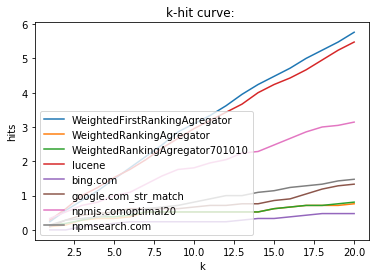

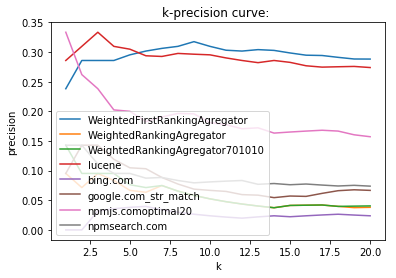

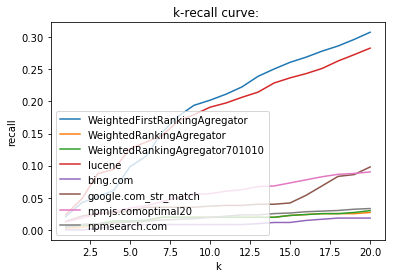

In [4]:
import matplotlib.pyplot as pl

def plplotk(pl,searcher,dataf):
        pl.plot(dataf['k'].tolist(), dataf[searcher].tolist(), label=searcher)

for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_hits)
    
pl.xlabel('k')
pl.ylabel('hits')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-hit curve: ')
pl.legend(loc="lower left")
pl.show()


for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_precision)
    
pl.xlabel('k')
pl.ylabel('precision')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-precision curve: ')
pl.legend(loc="lower left")
pl.show()


for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_recall)
    
pl.xlabel('k')
pl.ylabel('recall')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-recall curve: ')
pl.legend(loc="lower left")
pl.show()


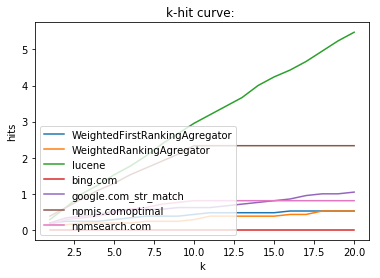

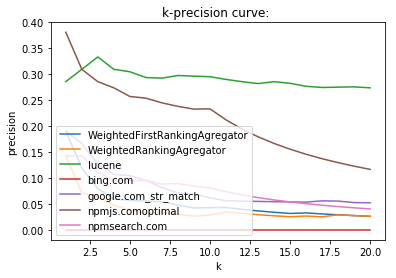

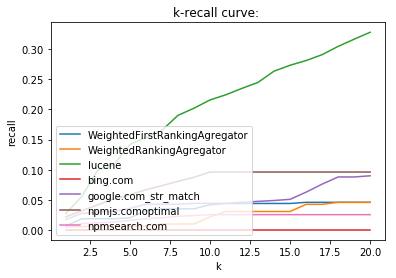

In [26]:
import matplotlib.pyplot as pl

def plplotk(pl,searcher,dataf):
        pl.plot(dataf['k'].tolist(), dataf[searcher].tolist(), label=searcher)

for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_hits)
    
pl.xlabel('k')
pl.ylabel('hits')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-hit curve: ')
pl.legend(loc="lower left")
pl.show()


for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_precision)
    
pl.xlabel('k')
pl.ylabel('precision')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-precision curve: ')
pl.legend(loc="lower left")
pl.show()


for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_recall)
    
pl.xlabel('k')
pl.ylabel('recall')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-recall curve: ')
pl.legend(loc="lower left")
pl.show()

